## Load CRITER DATA on a specific sub-graph

In [1]:
# GET PARAMETERS
import os 
import sys
import torch 
import pickle
if torch.cuda.is_available():
    torch.backends.cuda.matmul.allow_tf32 = True
    torch.backends.cudnn.allow_tf32  = True
# Get Parent folder : 

current_file_path = os.path.abspath(os.path.dirname(os.getcwd()))
if current_file_path not in sys.path:
    sys.path.insert(0,current_file_path)

from utils.save_results import load_json_file

path_folder = '../save/best_models' 
path_folder = f'{path_folder}/model_args.pkl'
json_file = pickle.load(open(path_folder,'rb'))


In [2]:
import sys 
import os 
import pandas as pd
import numpy as np
import torch 
from datetime import datetime
from argparse import Namespace
current_file_path = os.path.abspath(os.getcwd())
parent_dir = os.path.abspath(os.path.join(current_file_path,'..'))
if parent_dir not in sys.path:
    sys.path.insert(0,parent_dir)
from constants.paths import FOLDER_PATH
from load_inputs.CRITER_3_4_5_lanes_flow import DATA_SUBFOLDER,CHANNEL,START,END,FREQ,CITY,load_csvs
from plotting.plotting_bokeh import plot_sensor_anomaly


# INIT: 
alpha = 3.5
consider_holidays = True # If True then remove holidays from weekdays to compute mean and std. Consider holidays as a sunday.
agg_weekdays = False
quantile = 0.99
exponential_smoothing = True

df,df_anomalies_bool,df_mean,df_std,df_quantile_per_h,df_median_per_h,df_isnan = load_csvs(Namespace(**{'freq':'6min'}),FOLDER_PATH,pd.date_range(start = START,end =END,freq = FREQ)[:-1]
                                                ,data_subfolder = DATA_SUBFOLDER,
                                                channel = CHANNEL,
                                                limit_max_nan=200,
                                                taux_heure_limit = 100,
                                                filter_high_outliers = True,
                                                fill_consecutive_nan_value_values = True,
                                                linear_interpolation_when_one_missing = True, 
                                                quantile = quantile,
                                                accepting_factor = 1.5,
                                                consider_holidays = consider_holidays, 
                                                agg_weekdays = agg_weekdays, 
                                                exponential_smoothing = exponential_smoothing,
                                                alpha = alpha,  
                                                )

df.tail(2)

Number of invalid time-slots (i.e data when every single sensors does not have data): 82
number of nan values before filling :  609379
nb sparse_columns :  96
Number of sensors after filter sparse sensor :  51

Total anomalies detected: 81
 Data loaded with shape: (22080, 51)


ID_POINT_MESURE            15          48          50          54    \
2019-05-31 23:48:00  476.650164  620.396985  442.135264  136.978743   
2019-05-31 23:54:00  498.655115  626.277890  465.494685  140.885120   

ID_POINT_MESURE            56          64          65          66    \
2019-05-31 23:48:00  414.466692  412.270949  191.356142  413.183647   
2019-05-31 23:54:00  422.126684  387.589664  166.949299  409.228553   

ID_POINT_MESURE            67          74    ...        906         911   \
2019-05-31 23:48:00  188.096507  601.519230  ...  938.987422  864.689249   
2019-05-31 23:54:00  161.667555  586.063461  ...  888.291195  839.282474   

ID_POINT_MESURE            916         994         999         1000  \
2019-05-31 23:48:00  467.374479  128.339856  183.188922  388.198694   
2019-05-31 23:54:00  453.162135  110.837899  161.232245  370.739086   

ID_POINT_MESURE           1066        1176        1217        1795  
2019-05-31 23:48:00  78.714486  153.748487  408.678496  545.415894  
2019-05-31 23:54:00  73.100140  128.623941  373.074947  549.791126  

[2 rows x 51 columns]

In [3]:
df = pd.read_csv(f"{FOLDER_PATH}/{DATA_SUBFOLDER}/{DATA_SUBFOLDER}.csv",index_col = 0)
df

ID_POINT_MESURE  DEBIT_HEURE  TAUX_HEURE             HORODATE  \
103250                 15          260           1  2019-03-01 00:00:00   
103251                 15          440           2  2019-03-01 00:06:00   
103252                 15          350           1  2019-03-01 00:12:00   
103253                 15          290           1  2019-03-01 00:18:00   
103254                 15          170           1  2019-03-01 00:24:00   
...                   ...          ...         ...                  ...   
13443759             2127          910           1  2019-05-31 23:30:00   
13443760             2127          730           1  2019-05-31 23:36:00   
13443761             2127          650           1  2019-05-31 23:42:00   
13443762             2127          590           1  2019-05-31 23:48:00   
13443763             2127          680           1  2019-05-31 23:54:00   

          NOMBRE_ECH_1_MIN_MANQUANTS  
103250                             0  
103251                             0  
103252                             0  
103253                             0  
103254                             0  
...                              ...  
13443759                           0  
13443760                           0  
13443761                           0  
13443762                           0  
13443763                           0  

[3346042 rows x 5 columns]

## Identify Anomalie, replace Them by NaN:

In [8]:
loop_to_plot = 15  # 15 # 916 # id of sensors
p = plot_sensor_anomaly(df.copy(), df_anomalies_bool.copy(), 
                 df_mean,df_std,loop_to_plot,alpha,
                 df_quantile_per_h=df_quantile_per_h,df_median_per_h=df_median_per_h,
                 df_isnan = df_isnan,
                 freq = FREQ
                 ) # Pass copies

Loading BokehJS ...

In [4]:
loop_to_plot = 15  # 15 # 916 # id of sensors
p = plot_sensor_anomaly(df.copy(), df_anomalies_bool.copy(), 
                 df_mean,df_std,loop_to_plot,alpha,
                 df_quantile_per_h=df_quantile_per_h,df_median_per_h=df_median_per_h,
                 df_isnan = df_isnan,
                 freq = FREQ
                 ) # Pass copies

Loading BokehJS ...

In [ ]:

NIGHT_HOUR = [0,1,2,3,4,5,6,21,22,23]
city = CITY
df_out   = filtered_df.copy()
df_med,mask_reg,mask_hol,keys_reg   = _get_df_median(
    df,
    city=city,
    consider_holidays=consider_holidays,
    agg_weekdays=agg_weekdays,
)

# ------------------------------------------------------------------ #
#  2. Broadcast α to every time-stamp
# ------------------------------------------------------------------ #
df_reg = df_out.loc[mask_reg.values]
df_reg['hour'] = df_reg.index.hour
df_reg['minute'] = df_reg.index.minute
median_per_hour_minutes = df_reg.groupby(['hour','minute']).median()
df_correspondance = get_df_correspondance(df_reg,True)
df_expected_median_h_m = df_correspondance.merge(median_per_hour_minutes.reset_index(), on=['hour','minute'], how='left').drop(columns=['hour','minute']).set_index('index')

df_hol = df_out.loc[mask_hol.values]
df_hol['hour'] = df_hol.index.hour
df_hol['minute'] = df_hol.index.minute
median_per_hour_minutes_hol = df_hol.groupby(['hour','minute']).median()
df_correspondance_hol = get_df_correspondance(df_hol,True)
df_expected_median_h_m_hol = df_correspondance_hol.merge(median_per_hour_minutes_hol.reset_index(), on=['hour','minute'], how='left').drop(columns=['hour','minute']).set_index('index')
df_median_all = pd.concat([df_expected_median_h_m,df_expected_median_h_m_hol],axis=0).sort_index()

alpha =  df_out/df_median_all 


alpha[alpha.index.hour.isin(NIGHT_HOUR)] = 1

df_coeff_by_date = alpha[~alpha.index.hour.isin(NIGHT_HOUR)].copy()
df_coeff_by_date = df_coeff_by_date.groupby(df_coeff_by_date.index.date).mean()
df_coeff_by_date['date'] = df_coeff_by_date.index

alpha_reg =  alpha[~alpha.index.hour.isin(NIGHT_HOUR)][[]].copy()
alpha_reg['date'] = alpha_reg.index.date
alpha_reg['timestamp'] = alpha_reg.index
alpha_reg = alpha_reg.merge(df_coeff_by_date, on='date').set_index('timestamp').drop(columns=['date'])
alpha_reg
alpha[~alpha.index.hour.isin(NIGHT_HOUR)] = alpha_reg
# ------------------------------------------------------------------ #
#  3. Imputation
# ------------------------------------------------------------------ #
nan_mask = df_out.isna()
# scaled_median = median_template * α_day
scaled_median  = df_med.mul(alpha, axis=0)
df_out[nan_mask] = scaled_median[nan_mask]

/tmp/ipykernel_66534/1470694487.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['hour'] = df_reg.index.hour
/tmp/ipykernel_66534/1470694487.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['minute'] = df_reg.index.minute
/tmp/ipykernel_66534/1470694487.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [9]:
loop_to_plot = 916  # id of sensors
alpha = 3.5
consider_holidays = True # If True then remove holidays from weekdays to compute mean and std. Consider holidays as a sunday.
agg_weekdays = True
quantile = 0.99
# Replace high outliers by setting a limit based on quantile(99) *1.1.
# Distinguish 2 cases: 
#   - where there is a proper outliers (e.g  really high compared to the quantile. This one will be replace by interpolation)
#   - where there is a high but real values: set to quantile(99) * 1.1



# Get df_quantile_per_h:
df_quantile_per_h,df_median_per_h = get_df_quantile(df,quantile)

# Remove Impossible outliers:
if True:
    filtered_df = filter_high_outliers(df,df_quantile_per_h,accepting_factor = 1.5)
else:
    filtered_df = df.copy()

# Fill NaN value with linear interpolation when only one is missing:
if True: 
    df = df.interpolate(method='linear', limit_direction='both',limit = 1)

# Re-compute df_quantile_per_h again
df_quantile_per_h,df_median_per_h = get_df_quantile(df,quantile)

# Input NaN consecutive NaN value with historical regular behaviour':
df_isnan = filtered_df.isna()
if True:
    inputed_df =  impute_scaled_median(filtered_df,city = CITY, consider_holidays = consider_holidays, agg_weekdays=agg_weekdays) 
else:
    inputed_df = filtered_df.copy()
# Exponential Filter: 
if True:
    from denoising.exponential import ExponentialSmoother
    expsmoother = ExponentialSmoother(alpha=0.3)
    inputed_df = pd.DataFrame(expsmoother(torch.tensor(inputed_df.values)),index = inputed_df.index,columns = inputed_df.columns)

# Identify anomalies and plot them 
df_anomalies_bool,df_mean,df_std = create_df_bool_anomaly(inputed_df.copy(),alpha,consider_holidays,agg_weekdays,city = CITY)
p = plot_anomaly(inputed_df.copy(), df_anomalies_bool.copy(), 
                 df_mean,df_std,loop_to_plot,alpha,
                 df_quantile_per_h=df_quantile_per_h,df_median_per_h=df_median_per_h,
                 df_isnan = df_isnan
                 ) # Pass copies

# Impute isolated anomalies and identify chains
if False: 
    df_imputed, df_chained_anomalies = impute_isolated_anomalies_and_identify_chains(filtered_df.copy(), df_anomalies_bool.copy())

# Replace identified anomaly by NaN values
if False:
    df_temp_with_anomalies_as_nan = filtered_df.copy()
    df_temp_with_anomalies_as_nan[df_anomalies_bool] = np.nan
    print(f"NaNs in filtered_df['{loop_to_plot}'] after marking anomalies as NaN: {df_temp_with_anomalies_as_nan[loop_to_plot].isna().sum()}")
    print(f"NaNs in imputed df_imputed['{loop_to_plot}']: {df_imputed[loop_to_plot].isna().sum()}")

/tmp/ipykernel_272975/1925222855.py:410: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['hour'] = df_reg.index.hour
/tmp/ipykernel_272975/1925222855.py:411: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reg['minute'] = df_reg.index.minute
/tmp/ipykernel_272975/1925222855.py:417: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc


Total anomalies detected: 5933


Loading BokehJS ...

In [26]:
meta = get_df_correspondance(df,agg_weekdays)
meta['index'].apply(lambda date : date.strftime("%Y-%m-%d") in BANK_HOLIDAYS['Lyon'])

0        False
1        False
2        False
3        False
4        False
         ...  
22075    False
22076    False
22077    False
22078    False
22079    False
Name: index, Length: 22080, dtype: bool

## OLD JUPYTER

In [ ]:
import sys 
import os 
import pandas as pd
import numpy as np
import json
from shapely.geometry import Point
import geopandas as gpd 

current_file_path = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_file_path,'..'))
if parent_dir not in sys.path:
    sys.path.insert(0,parent_dir)
from constants.paths import FOLDER_PATH

''' This file has to :
 - return a DataSet object, with specified data, and spatial_units.
 - add argument 'num_nodes', 'C' to the NameSpace. These are specific to this data
 - Detail 'INVALID_DATE' and the 'coverage' period of the dataset.
'''

FILE_NAME = 'CRITER_3lanes/CRITER_3lanes'
START = '03/01/2019'
END = '06/01/2019'
FREQ = '30min'
list_of_invalid_period = []
#ist_of_invalid_period.append([datetime(2019,1,10,15,30),datetime(2019,1,14,15,30)])

#C = 1
#num_nodes = 


def load_gdf_criter(json_folder_path,json_name):
    criter_json = json.load(open(f"{json_folder_path}/{json_name}",'r'))

    #Convert the Json to a GeoDataFrame : 
    tmp_list = []
    for k in range(len(criter_json["values"])):
        dic = criter_json["values"][k]
        dic['geometry'] = Point(dic['lon'],dic['lat'])
        tmp_list.append(dic)
    gdf = gpd.GeoDataFrame(tmp_list)
    gdf.crs = 'EPSG:4326'
    return gdf

def filter_idptm(x,idptm_list,sparse_columns,columns_with_nan,limit_max_nan):
    if x in idptm_list:
        if x in sparse_columns:
            return f'More than {limit_max_nan} NaN Values'
        elif x in columns_with_nan:
            return f'Less than {limit_max_nan}  NaN Values'
        
        else:
            return 'Full Data'
    else:
        return 'Value Missing for at least one month'

## Load CRITER Data without any aggregation:

In [85]:
def restrain_df_to_specific_period(df,coverage_period):
    if coverage_period is not None:
        df = df.loc[coverage_period]
    return df


def remove_sparse_sensor(df,limit_max_nan = 200):
    df_with_nan = pd.DataFrame()
    for c in df.columns:
        if df[c].isna().sum() > 0:
            df_with_nan[c] = df[c]

    s_nb_nan_per_columns = df_with_nan.isna().sum()
    #print('Nb nan values per sensors:\n',s_nb_nan_per_columns.values)
    sparse_columns = s_nb_nan_per_columns[s_nb_nan_per_columns>limit_max_nan].index

    df = df.drop(columns = df_with_nan.columns)
    nan_too_empty = df_with_nan[sparse_columns]
    df_with_nan = df_with_nan.drop(columns = sparse_columns)
    return df,df_with_nan,nan_too_empty,sparse_columns


def load_csvs(args,ROOT,FOLDER_PATH,coverage_period,taux_heure_limit = 100):
    # Load df: 
    names = ['TAUX_HEURE','DEBIT_HEURE']
    for name in names: 
        globals()[f"df_{name}"] = pd.DataFrame()
    idptm_list = []
    for month_name in ['Mars','Avril','Mai']:
        df_i = pd.read_csv(f"{current_file_path}/{FOLDER_PATH}/{FILE_NAME}_{month_name}.csv",index_col = 0)
        df_i.HORODATE = pd.to_datetime(df_i.HORODATE)
        forbidden_ids = df_i[df_i.TAUX_HEURE > taux_heure_limit].ID_POINT_MESURE.unique()
        init_idptm = list(df_i.ID_POINT_MESURE.unique())
        remaining_idptm = [idptm for idptm in init_idptm if not idptm in forbidden_ids]
        idptm_list.append(remaining_idptm)

        for name in names:
            df_ii = df_i.pivot_table(index = 'HORODATE',columns = 'ID_POINT_MESURE',values = name).sort_index()
            reindex_dates = pd.date_range(df_ii.index.min(),df_ii.index.max(),freq=args.freq)
            df_ii = df_ii.reindex(reindex_dates)
            globals()[f"df_{name}"] = pd.concat([globals()[f"df_{name}"],df_ii])

    idptm_list = list(set.intersection(*map(set, idptm_list)))
    for name in names:
        globals()[f"df_{name}"] =restrain_df_to_specific_period(globals()[f"df_{name}"][idptm_list],coverage_period=coverage_period)
        globals()[f"df_{name}"] = globals()[f"df_{name}"].resample(args.freq).mean()

    return [globals()[f"df_{name}"] for name in names]


save_folder = 'K_fold_validation/training_with_HP_tuning/re_validation'
trial_id = 'subway_in_STGCN_MSELoss_2025_01_20_14_27_20569'
epochs_validation = 1
limit_max_nan = 200
taux_heure_limit = 100
args,folds = load_best_config_from_HPO(trial_id)
args.freq = '6min'
df_TAUX_HEURE,df_DEBIT_HEURE = load_csvs(args,current_file_path,FOLDER_PATH,coverage_period=None,taux_heure_limit = taux_heure_limit)


# Interpolation: 
if False:
    limit_interpolation = 1
    df_TAUX_HEURE = df_TAUX_HEURE.interpolate(limit = limit_interpolation)
#df_loop_occupancy_rate_full,df_occupancy_with_nan,nan_too_empty_occupancy,sparse_columns_occupancy = remove_sparse_sensor(globals()['df_TAUX_HEURE'],limit_max_nan)
#df_flow_full,df_occupancy_with_nan,nan_too_empty_occupancy,sparse_columns_occupancy = remove_sparse_sensor(globals()['df_TAUX_HEURE'],limit_max_nan)


>>>> Load best CONFIG


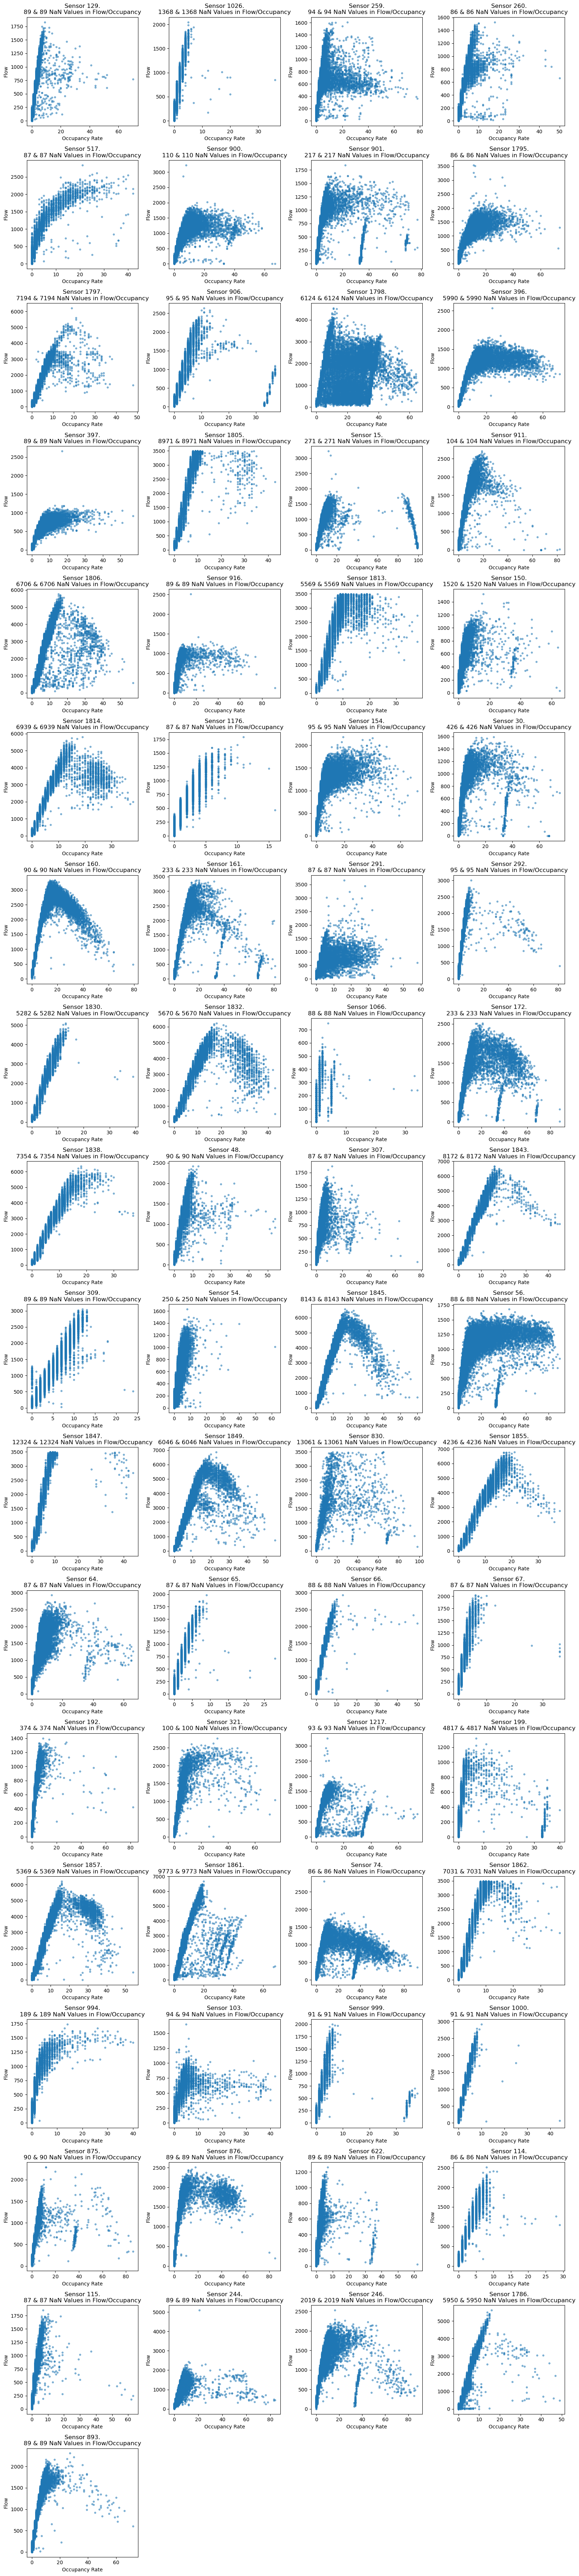

In [95]:
import math
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Supposons que df_TAUX_HEURE et df_DEBIT_HEURE ont le même nombre de colonnes, dans le même ordre
columns = df_TAUX_HEURE.columns

# Calcul du nombre de lignes nécessaires pour organiser nos subplots en 6 colonnes
ncols = 4
n = math.ceil(len(columns) / ncols)

fig, axes = plt.subplots(nrows=n, ncols=ncols, figsize=(4*ncols, 4*n))
axes = axes.flatten()  # Pour itérer facilement sur la liste

for i, col in enumerate(columns):
    ax = axes[i]
    
    # Masque pour ne garder que les lignes sans NaN dans df_TAUX_HEURE[col] et df_DEBIT_HEURE[col]
    mask = df_TAUX_HEURE[col].notna() & df_DEBIT_HEURE[col].notna()
    
    # Tracé du scatter plot sans NaN
    ax.scatter(df_TAUX_HEURE.loc[mask, col],
               df_DEBIT_HEURE.loc[mask, col],
               s=10, alpha=0.5)
    
    # Calcul du nombre de valeurs NaN
    nb_nan_flow = df_DEBIT_HEURE[col].isna().sum()
    nb_nan_occupancy = df_TAUX_HEURE[col].isna().sum()
    
    # Création d'une "fausse" ligne pour afficher notre texte sous forme de légende
    title = (f"Sensor {col}.\n{nb_nan_flow} & {nb_nan_occupancy} NaN Values in Flow/Occupancy")
    
    # On crée un Line2D vide et on utilise son label comme légende
    ax.legend([Line2D([], [], linestyle='', marker='')],
              [], frameon=False)
    
    # Étiquettes des axes (optionnel)
    ax.set_xlabel('Occupancy Rate')
    ax.set_ylabel('Flow')
    ax.set_title(title)  # Titre avec le nom de la colonne (optionnel)

# Si le nombre de colonnes est inférieur au nombre de subplots, on supprime les subplots inutilisés
if len(columns) < len(axes):
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [12]:
limit_max_nan = 200
df_loop_occupancy_rate_full,df_with_nan,nan_too_empty,sparse_columns = remove_sparse_sensor(df_loop_occupancy_rate,limit_max_nan = limit_max_nan)


json_folder_path = f"{parent_dir}/{FOLDER_PATH}/../raw_data/Comptages_Velo_Routier/CRITER"

json_name = 'pvo_patrimoine_voirie.pvocomptagecriter.json'
gdf_init = load_gdf_criter(json_folder_path,json_name)


gdf = gdf_init[gdf_init.nbvoies == 3].drop_duplicates('identifiantptm')

print(f'Numer of init sensor with 3 lanes: {len(gdf)}')
print(f'Number of sensor with data for each months: {len(idptm_list)}')
print(f'Among them, number of sensor with more than {limit_max_nan} missing values: {len(sparse_columns)} ')
print(f'Among them, number of sensor with less than {limit_max_nan} missing values:  {len(list(df_with_nan.columns))} ')


gdf['removed'] = gdf.identifiantptm.apply(lambda x : filter_idptm(x,idptm_list,sparse_columns,list(df_with_nan.columns),limit_max_nan))
gdf[['gid','identifiantptm','geometry','removed']].explore('removed',
                                                           style_kwds={"style_function":lambda x: {"radius":7},'color':'black'}
                                                           )

Numer of init sensor with 3 lanes: 144
Number of sensor with data for each months: 69
Among them, number of sensor with more than 200 missing values: 0 
Among them, number of sensor with less than 200 missing values:  13 


In [13]:
gdf[gdf.removed == 'Full Data'][['gid','identifiantptm','geometry']].explore(style_kwds={"style_function":lambda x: {"radius":7},'color':'black'})

In [68]:


from plotting.TS_analysis import plot_TS
plot_TS(df_nan,width=1400,height=600,bool_show=True,title=f"Time Serie Loop Occupation Rate")

Loading BokehJS ...

figure(id='p3567', ...)